### **TRABALHO 1**
### **Resposta de um sistema com 1 g.d.l. a uma excitação na base: espectro de pseudo aceleração.**

_Mestrado em Engenharia Civil na Área de Estruturas / Universidade Federal do Rio Grande do Sul_

_PPGEC-UFRGS / PEC00025 - Introdução à Teoria de Vibrações_

**Docente:** Marcelo Maia Rocha

**Discente:** Pedro Henrique Fontes Silva // **Matrícula:** 00312234


### 1. Introdução

Este trabalho, realizado na disciplina Introdução à Teoria de Vibrações (PEC00025), tem como finalidade o desenvolvimento de gráficos de pseudo-aceleração e periodogramas da resposta de um sistema com um grau de liberdade (1 g.d.l.), através de uma excitação dinâmica em sua base realizada por uma aceleração ao longo do tempo, registrada através do aplicativo _INVH (Bosh)_ versão 2.1.1, disponível na plataforma _Android_. Com os dados coletados, a etapa seguinte consistiu na implantação dos mesmos em um _notebook_ no _Jupyter_, sendo possível introduzir o arquivo, processar uma resposta através dos comandos dispostos no sistema e obter gráficos do espectro de pseudo-aceleração e os periodogramas. Realizou-se essa etapa através da variação do índice Fn, captando os valores máximos de pico e gerando assim os gráficos apresentados posteriormente, bem como os periodogramas do sinal de entrada pela aceleração e de saída pela resposta de uma frequência determinada do sistema exposto a tal excitação.

### 2. Propriedades iniciais

As propriedades iniciais do sistema de um grau de liberdade (_sdof - single degree of freedom)_ e os módulos necessários, foram especificados abaixo. A massa em kg, foi definida previamente através de estimativa do sistema analisado. Utilizou-se a classe _MRPy (Multivariate Random Processes with Python)_ desenvolvida pelo Prof. Marcelo Maia Rocha.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from MRPy import MRPy

In [2]:
m  = 15.0       # system mass in kg
fn = 1.0       # natural frequency in Hz
zt = 0.01      # damping as ratio of critical
u0 = 0.        # initial displacement
v0 = 0.        # initial velocity

### 3. Resultados

Para a realização do trabalho, a captação da aceleração ao longo do tempo foi realizada em uma escada metálica de grande circulação de público, localizada no POP Center - Centro Popular de Compras de Porto Alegre, conforme representação na Figura 1. Esse procedimento foi realizado através do aplicativo _INVH (Bosh)_ disponível na plataforma _Android_.

                           Figura 1 - Escada metálica da POP Center

<img src="Pictures/Figura1.png" alt="Escada" width="500px"/>

O arquivo gerado pelo aplicativo tem formato _.csv_ e apresenta o tempo de amostragem e as três acelerações ao longo dos três eixos de medição (x, y e z). A seguir, são apresentadas as leituras realizadas do arquivo.

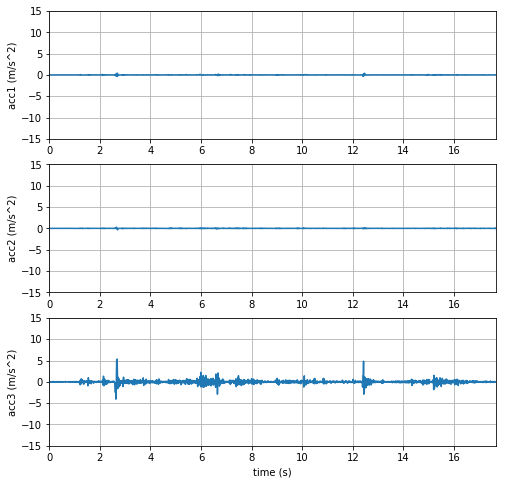

In [3]:
data = MRPy.from_file('312234', form='invh').zero_mean()
t    = data.t_axis()

plt.figure(6, figsize=(8, 8), clear=True)

for kX, acc in enumerate(data):
    
    plt.subplot(3, 1 ,kX+1)
    plt.plot(t, acc)

    plt.xlim(0, data.Td);   
    plt.ylim(-15, 15);
    plt.ylabel('acc{0} (m/s^2)'.format(kX+1)) 

    plt.grid(True) 

plt.xlabel('time (s)');

Sendo a direção vertical a mais adequada para o estudo em análise e considerando ainda que a componente apresenta maiores amplitudes de aceleração, isola-se a aceleração ao longo do eixo z:

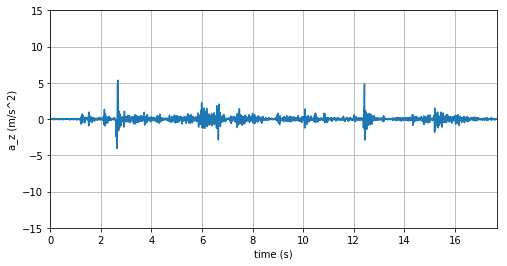

In [4]:
az = MRPy(data[2], data.fs)  
t  = az.t_axis()

plt.figure(7, figsize=(8, 4), clear=True)
plt.plot(t, az[0])

plt.xlim(0, az.Td);  plt.xlabel('time (s)') 
plt.ylim(-15, 15);   plt.ylabel('a_z (m/s^2)') 

plt.grid(True)

Agora a aceleração em análise será aplicada como uma excitação de base para um sistema _sdof_ com as mesmas propriedades definidas nas seções anteriores. No entanto, variando **fn** entre 1.0 e 10.0, obtendo diferentes valores de pico máximo, possibilitando gerar o gráfico do pseudo espectro.

0.00026456277199167944
-0.00031959219508098663


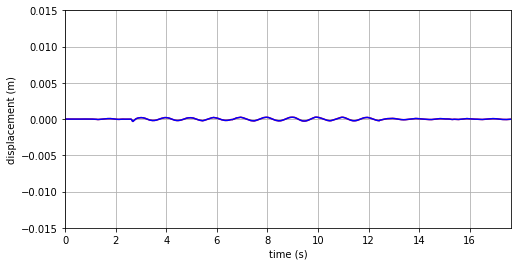

In [5]:
fn = 1.0
u_FD = az.sdof_fdiff  (fn, zt, u0, v0)/m
u_DH = az.sdof_Duhamel(fn, zt, u0, v0)/m

plt.figure(8, figsize=(8, 4), clear=True)
plt.plot(t, u_FD[0], 'r', t, u_DH[0], 'b')

plt.xlim(0, az.Td);        plt.xlabel('time (s)') 
plt.ylim(-0.015, 0.015);   plt.ylabel('displacement (m)') 

plt.grid(True)
print(u_FD.max())
print(u_FD.min())

### 3.1 Gráfico do espectro de pseudo-aceleração
Através dos valores máximos captados na variação de **fn** e dos comandos apresentados abaixo, tem-se o gráfico do espectro da pseudo-aceleração.

Maior deslocamento: 0.00042279014198317504
Frequência natural correspondente ao pior cenário de u: 3
Rígidez da estrutura= 5329.586376588253
Feq= 0.00042279014198317504


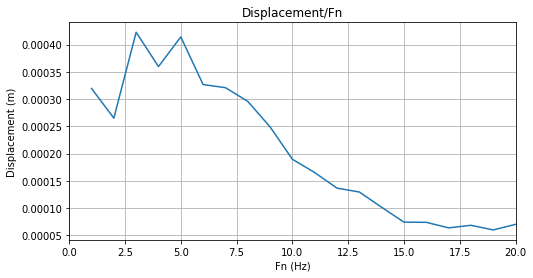

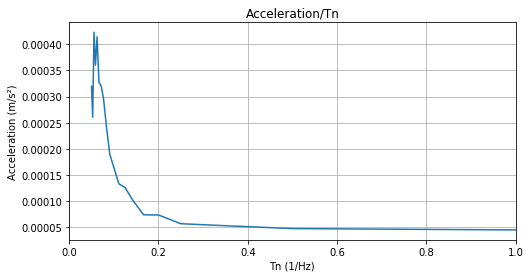

In [6]:
fn = 0
Lfn = []
Lumax=[]
Lwn = []
Ltn = []
for nume in range(20):
    fn += 1
    Lfn.append(fn)
    Ltn.append(1/fn)
    u_FD = az.sdof_fdiff  (fn, zt, u0, v0)/m
    u_DH = az.sdof_Duhamel(fn, zt, u0, v0)/m
    mini=u_FD.min()
    maxi=u_FD.max()
    mini = mini * -1
    if mini>maxi:
        Lumax.append(mini)
        Wn=mini*(1/fn*fn)
        Lwn.append(Wn)
    else:
        Lumax.append(maxi)
        Wn=mini*(1/fn*fn)
        Lwn.append(Wn)
        
maior=max(Lumax)
print ('Maior deslocamento:',maior)   
n_pos = Lumax.index(maior)
maiorfn=Lfn[n_pos]
_wn=2*np.pi*maiorfn
k=_wn*_wn*m
Feq=k*maior
print('Frequência natural correspondente ao pior cenário de u:',maiorfn)
print('Rígidez da estrutura=',k)
print('Feq=',maior)

plt.figure(9, figsize=(8, 4), clear=True)
plt.plot(Lfn,Lumax)

plt.xlim(0, 20);        plt.xlabel('Fn (Hz)') 
plt.ylabel('Displacement (m)') 
plt.title('Displacement/Fn')
plt.grid(True) 

Ltn.reverse()

plt.figure(10, figsize=(8, 4), clear=True)
plt.plot(Ltn,Lwn)

plt.xlim(0, 1);        plt.xlabel('Tn (1/Hz)') 
plt.ylabel('Acceleration (m/s²)') 
plt.title('Acceleration/Tn')
plt.grid(True)

### 3.2 Periodograma

Para elaboração do periodograma utilizou a função _periodogram_ presente no módulo MRPy, sendo possível observar a frequência com maior energia que se encontra mais próxima da frequência natural de vibração do sistema. São apresentados o periodograma dos valores de entrada, pela aceleração, e o periodograma dos valores de saída, pela resposta de uma frequência do sistema de 1 g.d.l. exposto a uma excitação na base.

Valor de pico: 28.838434924681156 Hz


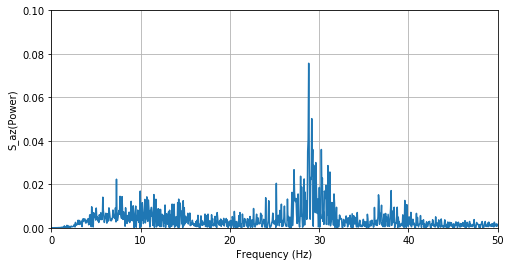

In [7]:
# Cálculo periodograma de entrada

Saz, fs = az.periodogram()
f = az.f_axis()

plt.figure(12, figsize=(8, 4), clear=True)
plt.plot(f,Saz[0])

plt.xlim(0,50);   plt.xlabel('Frequency (Hz)')
plt.ylim(0,0.1);   plt.ylabel('S_az(Power)')

plt.grid(True)

fpico = f[np.argmax(Saz[0])]
print("Valor de pico:", fpico, "Hz")

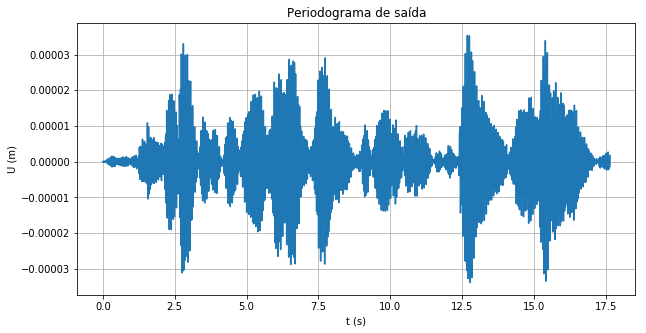

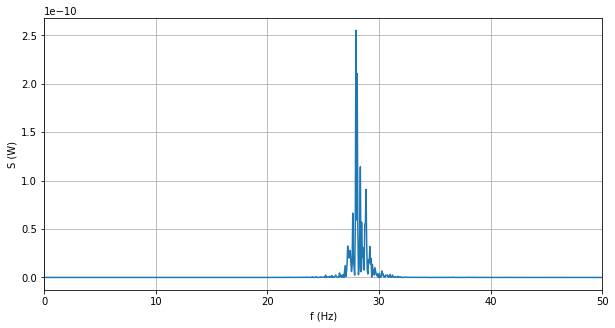

In [8]:
# Cálculo periodograma de saída

fnout = 28
uout = az.sdof_Duhamel(fnout, zt, u0, v0)/m

plt.figure(figsize=(10, 5))
plt.title("Periodograma de saída")
plt.plot(t, uout[0])
plt.xlabel('t (s)') 
plt.ylabel('U (m)')

plt.grid(True)

Sout, fsout = uout.periodogram()
fout = uout.f_axis()

plt.figure(figsize=(10, 5))
plt.plot(fout, Sout[0])
plt.xlim(0, 15); plt.xlabel('f (Hz)') 
plt.xlim(0, 50); plt.ylabel('S (W)') 

plt.grid(True)

### 4. Conclusão

Através da realização da análise da resposta de um sistema submetido à excitações no tempo em sua base, utilizando o aplicativo _INVH (Bosh)_ e a classe _MRPy_, foi possível assimilar o aprendizado em sala de aula com os resultados obtidos. Foram apresentados conceitos e comandos necessários para a confecção dos gráficos de espectro de pseudo-aceleração e periodogramas de um sistema de um grau de liberdade, definido de acordo com as componentes do eixo z. Através dos resultados, temos no gráfico do periodograma que o pico da frequência de maior energia do sistema encontra-se em 28.8 Hz.